In [1]:
# imports

import pandas as pd
import requests
import csv
import json 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [2]:
# get data from website
CA = requests.get("https://api.covidtracking.com/v2/states/ca/daily/simple.json")
TX = requests.get("https://api.covidtracking.com/v2/states/tx/daily/simple.json")

In [3]:
# getting json data we want
texas = TX.json()['data']
cali = CA.json()['data']

In [4]:
# get data for texas into an array
TX_array = []
temp = []
for item in texas:
    if temp != []:
        TX_array.append(temp)
    # reset temp array
    temp = []
    
    #add needed values to our array
    temp.append(item['date'])
    temp.append(item['cases']['total'])
    temp.append(item['outcomes']['recovered'])
    temp.append(item['outcomes']['hospitalized']['currently'])
    temp.append(item['outcomes']['hospitalized']['in_icu']['currently'])
    temp.append(item['outcomes']['death']['total'])

# replaces NoneTypes with 0
# NoneTypes are when there is no data collected, like deaths at the begining are all 0
for index1, i in enumerate(TX_array):
    for index2, j in enumerate(i):
        if type(j) is type(None):
            TX_array[index1][index2] = 0
TX_array.pop(52)

['2021-01-14', 2045699, 1630778, 14052, 3662, 31050]

In [5]:
# get data for California into an array
CA_array = []
temp = []
for item in cali:
    if temp != []:
        CA_array.append(temp)
    # reset temp array
    temp = []
    
    #add needed values to our array
    temp.append(item['date'])
    temp.append(item['cases']['total'])
    temp.append(item['outcomes']['recovered'])
    temp.append(item['outcomes']['hospitalized']['currently'])
    temp.append(item['outcomes']['hospitalized']['in_icu']['currently'])
    temp.append(item['outcomes']['death']['total'])
    
# replaces NoneTypes with 0
# NoneTypes are when there is no data collected, like deaths at the begining are all 0
for index1, i in enumerate(CA_array):
    for index2, j in enumerate(i):
        if type(j) is type(None):
            CA_array[index1][index2] = 0
            

In [6]:
# make dates easy to put in order
# for index, item in enumerate(TX_array):
#     item[0] = int(item[0].replace("-",""))
#     TX_array[index][0] = item[0]
    
# for index, item in enumerate(CA_array):
#     item[0] = int(item[0].replace("-",""))
#     CA_array[index][0] = item[0]

for index, item in enumerate(CA_array):
    dt = datetime.strptime(item[0], '%Y-%m-%d')
    dt = time.mktime(dt.timetuple())
    item[0] = dt
    CA_array[index][0] = item[0]
    
for index, item in enumerate(TX_array):
    dt = datetime.strptime(item[0], '%Y-%m-%d')
    dt = time.mktime(dt.timetuple())
    item[0] = dt
    TX_array[index][0] = item[0]


In [7]:
# making it a dataframe because I know how to work with those
column_values = ['date', 'cases', 'recovered', 'hospitalized', 'icu', 'death']
TxArray = np.array(TX_array)

Tx_df = pd.DataFrame(data = TxArray, 
                  columns = column_values)


CaArray = np.array(CA_array)

Ca_df = pd.DataFrame(data = CaArray, 
                  columns = column_values)


In [8]:
# date = []
# for item in Ca_df['date']:
#     date.append(item)
    
# Tx_cases = []
# Tx_recovered = []
# Tx_icu = []
# Tx_deaths = []
# Tx_hospitalized = []

# for item in Tx_df['cases']:
#     Tx_cases.append(item)
    
# for item in Tx_df['recovered']:
#     Tx_recovered.append(item)
    
# for item in Tx_df['hospitalized']:
#     Tx_hospitalized.append(item)
    
# for item in Tx_df['icu']:
#     Tx_icu.append(item)
    
# for item in Tx_df['death']:
#     Tx_deaths.append(item)
# Tx_deaths.pop()
    
# Ca_cases = []
# Ca_recovered = []
# Ca_icu = []
# Ca_deaths = []
# Ca_hospitalized = []

# for item in Ca_df['cases']:
#     Ca_cases.append(item)
    
# for item in Ca_df['recovered']:
#     Ca_recovered.append(item)
    
# for item in Ca_df['hospitalized']:
#     Ca_hospitalized.append(item)
    
# for item in Ca_df['icu']:
#     Ca_icu.append(item)
    
# for item in Ca_df['death']:
#     Ca_deaths.append(item)

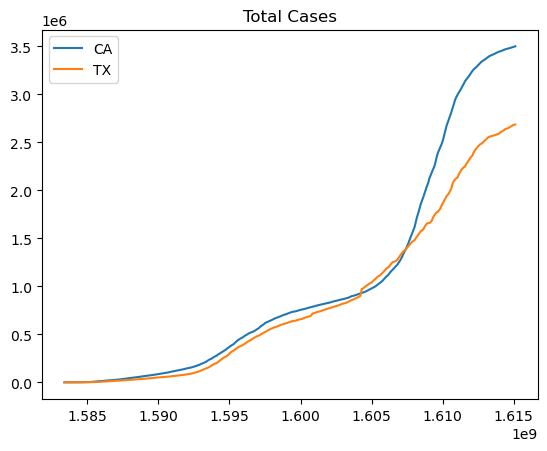

In [9]:
plt.plot(Ca_df.date, Ca_df.cases, label="CA")
plt.plot(Ca_df.date, Tx_df.cases, label="TX")
plt.legend()
plt.title("Total Cases")

plt.show()

In [15]:
Ca_df.recovered

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
363    0.0
364    0.0
365    0.0
366    0.0
367    0.0
Name: recovered, Length: 368, dtype: float64

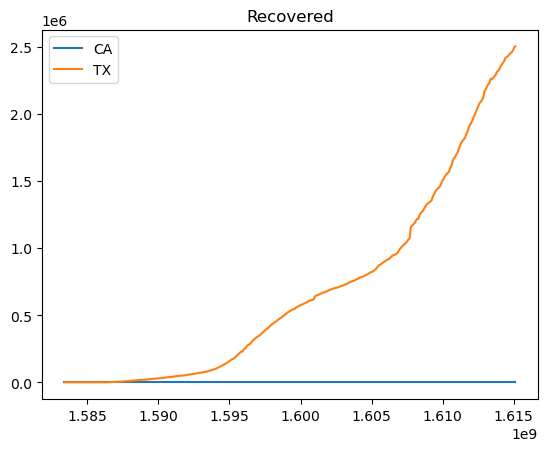

In [10]:
plt.plot(Ca_df.date, Ca_df.recovered, label="CA")
plt.plot(Ca_df.date, Tx_df.recovered, label="TX")
plt.legend()
plt.title("Recovered")

plt.show()

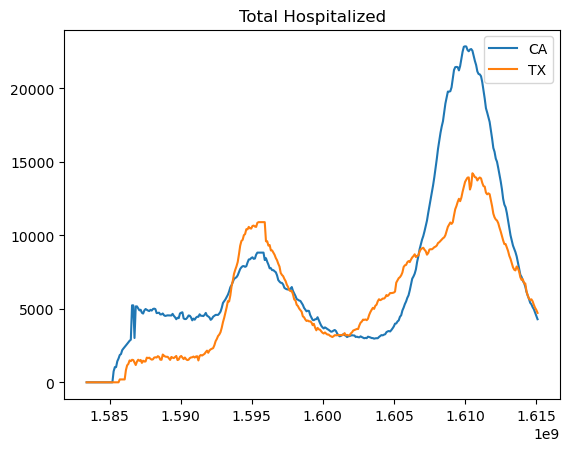

In [11]:
plt.plot(Ca_df.date, Ca_df.hospitalized, label="CA")
plt.plot(Ca_df.date, Tx_df.hospitalized, label="TX")
plt.legend()
plt.title("Total Hospitalized")

plt.show()

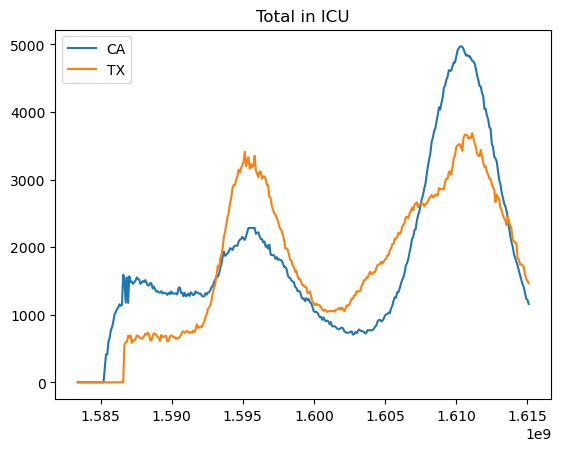

In [12]:
plt.plot(Ca_df.date, Ca_df.icu, label="CA")
plt.plot(Ca_df.date, Tx_df.icu, label="TX")
plt.legend()
plt.title("Total in ICU")

plt.show()

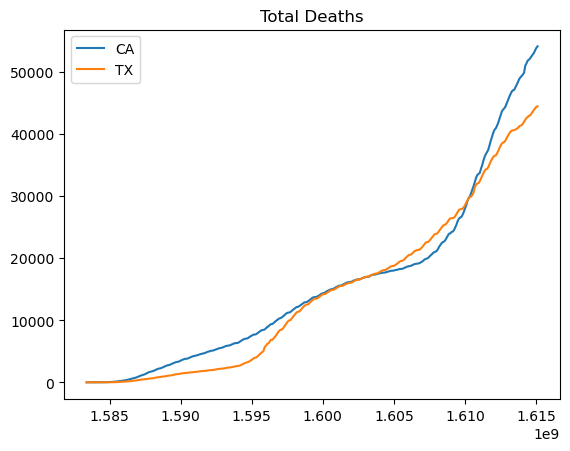

In [13]:
plt.plot(Ca_df.date, Ca_df.death, label="CA")
plt.plot(Ca_df.date, Tx_df.death, label="TX")
plt.legend()
plt.title("Total Deaths")

plt.show()